# Team 5

## Team members
***
1. Нагорный Павел / NPV
2. Elena Nazarenko 
3. Elena Popkova
4. Ruslan Kamyshenkov / Kamyshenkov_Ruslan
5. Mike Mednikov
6. Vitaliy Glushchenko

## Task
***
Нужно решить задачу с помощью 3х методов:
1. кнн
2. дерева принятия решения
3. логистической регрессии

Залить, на ваш взгляд, лучшее решение.

Это командное ДЗ, его нужно выполнить совместно с вашими коллегами. Коммит делается от одного выбранного участника. Для зачета нужно:
1. предоставить ноутбук с кодом, где вы попробовали все 3 метода
2. залить предсказания для теста и найти себя в лидерборде

Команда, занявшая 1 место, получит дополнительный балл. Метрика качества ROC-AUC. Дедлайн расширенный.

Поехали...

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, validation_curve
from sklearn.linear_model import LogisticRegression

from scipy.stats import randint as randint
from scipy.stats import uniform

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
%matplotlib inline

def parse(object):
    for i in object.columns:
        if str(object[i].dtype) == 'object':
            print("\n=================\ncolumn: ",i,"\n")
            print(object[i].value_counts()) 
            print('\n')

***
## Предварительный (очень краткий) анализ

In [2]:
# получим данные для обучения
df_train = pd.read_csv('data/train.csv')
print(df_train.shape,"\n")
print("количество неполных записей\n",df_train.isnull().sum(),"\n")
df_train.info()

(24712, 22) 

количество неполных записей
 _id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null o

In [3]:
parse(df_train)


column:  _id 

7ba4a33cf0b9aab6b0e925f63bf3cbb4    1
89f03d64795772405e43e5970f799b8f    1
e0f1b496dc5c65b2066e5828eeff3356    1
52f86603fe79d6b04493d3259f348dc9    1
3ec27034eb407f4e005c159122e327fa    1
27e7ce0236f58a7ce2cf5e358d31d13e    1
cd1eeca10a4474354aad83b39ec21de6    1
544e20ed3915bce4fd3c0cad3ddacb30    1
69781a9bda89a63b0b8ee4202c622eec    1
0eb27663296fb0fc5e127c532f2e7024    1
fc52337cce5b43b3868130e1857b0a44    1
96836eeb2624c65e8b17d0cac724552b    1
c2309c5a54cbf584537f690dc368704f    1
6b3698008143c584cfa77ee615d0e26e    1
0886d29a366e162f9999e89b5e3d60a4    1
b79c8037cc5c763668e6ffd2039992d8    1
220d9cc611f7275a8d1a96a7e93eb749    1
3aaf978a197dc01a40714b0e30f819b9    1
48b4b2c4770a0985d4a4d878dfa09138    1
fef3dd38a269e1733bdb33929d4267fa    1
ed41466e4b7751e5b1fbe8904075f6ea    1
9de4553157cda70d2a1fa6644a614e9b    1
69805e43878ac17e63662da2663df5ea    1
c967daf6f23543aa832eb5a0354095cd    1
25262cdbf63a5d3ce6a0b5183fdc1a97    1
e2aa232794d64feb5851d2e48454c4c2  

### предварительные выводы для \_train
1. пустышек нет   
2. ряд колонок - объекты и требуют кодирования
3. перекосов в данных нет, ибо все более-менее одинаково (отсутствуют в одной колонке величины типа 1'000'000 и 10..50)



In [4]:
# получим данные для анализа
df_test = pd.read_csv('data/test.csv')
print(df_test.shape,"\n")
print("количество неполных записей\n",df_test.isnull().sum(),"\n")
df_test.info()

(16476, 21) 

количество неполных записей
 _id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week   

In [5]:
parse(df_test)


column:  _id 

f1560a62b369b7af2b9510979409439a    1
ec4e9728a139bd39736f048c166d02bf    1
28e08df3bcb73b246be2406d98716dbb    1
c5f3a1c0579d3a432d432f320d462535    1
3dbd2e7d84e8a5077e3bfa0e481d9f40    1
7aee5ebcc777a65a62315be9da7545b5    1
4b47e6aac332b1fd7dbe78e5b0235d1b    1
bca8b14697299e9ff8307b22d3c3616f    1
225d8c1f2e3fab021ece5bba952a7eff    1
5ea95c6c032803716d61e9a9a458e3ec    1
09bd5191335ad3d5bf5a3b5e1cf86537    1
ac358350045d02e7a7f5f6403f37bacc    1
4d3bb20b1339448429a764146b757d54    1
9b675612d68b2773c3b9b6d2837916dd    1
f6fdd2230b589ebfccea2743ba6e089a    1
3ad2fd25c867bf0a743346acad927ac4    1
7afe9a1316b7fa213dab440e1b8f439a    1
7ede5aed9ee812231402bf4e7d3d5018    1
f9348396019935023f932be0131fd474    1
86ae25fd8fc8ff16262133e5e6b578bc    1
6ef3fa1b368e745338e2da553b9393ce    1
78cf3e5a6ec7c00853f465ba80515da4    1
e273a0d9c3287d8768144d71a9e790bb    1
0805fe85bace948a8ace571296c4e402    1
fd04cdb8b4eb58100e88d6f9d4d8f327    1
9498994000875ab9ff9f8bd5d33ce271  

### предварительные выводы для \_test
1. пустышек нет   
2. ряд колонок - объекты и требуют кодирования
3. перекосов в данных нет, ибо все более-менее одинаково (отсутствуют в одной колонке величины типа 1'000'000 и 10..50)



### окончательные выводы по данным
1. пустышек нет, заполнять искусственно нет необходимости
2. колонки с типом данных "object" должны быть подвергнуты one-hot-encoding
3. настораживает поле дефолта по кредиту [default] - полагаю есть смысл его удалить?
4. в силу того, что я не знаю, как работает эта doom machine (я не настолько зверюга, чтобы с наскока понять эту математику), считаю использование scaler необходимым (хотя я и не видел перекосов в данных)


***
## Подготовка обучающих данных

In [6]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['default'], axis=1)
    #Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
    return df_output

In [7]:
# обработаем _train 
df_train_preproc = df_train.pipe(preproc_data)

# получим вектор y и матрицу признаков Х (попутно удалив колонку _id, ибо она ну совсем не нужна нам) 
y = df_train_preproc['target']
X = df_train_preproc.drop(['_id', 'target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
X_test.shape

(7414, 60)

In [9]:
y_test.shape

(7414,)

In [10]:
X_train.shape

(17298, 60)

In [11]:
y_train.shape

(17298,)

***

# Три метода анализа

## Метод KNeighborsClassifier

In [12]:
model_KNN = Pipeline([ ('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3)) ])

model_KNN.fit(X_train, y_train)

predict_KNN = model_KNN.predict(X_test)
predict_proba_KNN = model_KNN.predict_proba(X_test)

## Метод DecisionTreeClassifier (один гиперпараметр)

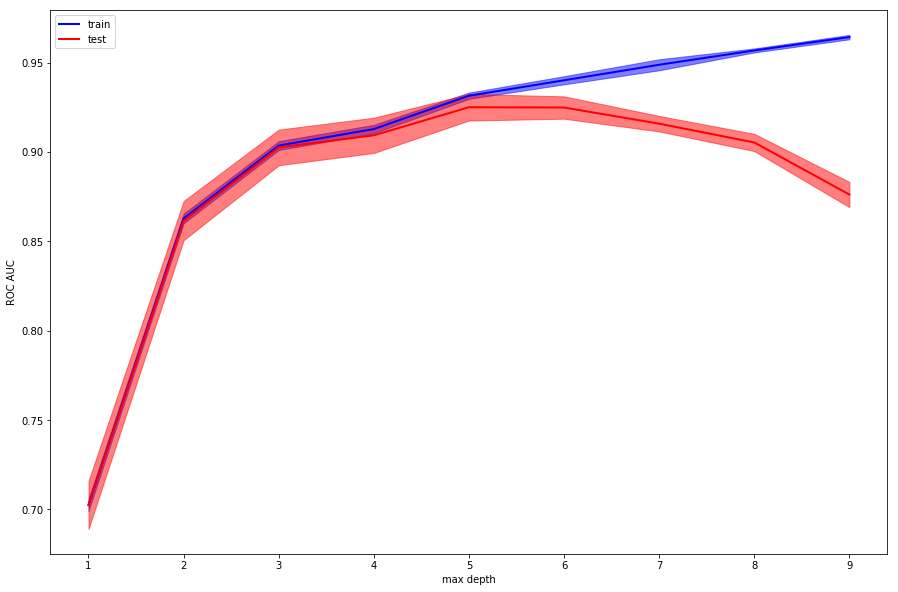

In [13]:
model_DTC = DecisionTreeClassifier(random_state=123)
model_DTC.fit(X_train, y_train)

# кросс-валидируем, 5 частей
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

# validation_curve(estimator, X, y, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)
train_scores, valid_scores = validation_curve(model_DTC, X, y, 'max_depth', range(1, 10), cv=cv, scoring='roc_auc')

train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)

valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.figure(figsize=(15, 10))

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')
plt.legend(['train','test'],loc='best')

plt.show()

In [14]:
# в нашем случае используем глубину перебора, равную 5 (или все же 6?)
max_depth = 5
model_DTC = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=123)
model_DTC.fit(X_train, y_train)

predict_DTC = model_DTC.predict(X_test)
predict_proba_DTC = model_DTC.predict_proba(X_test)

## Метод DecisionTreeClassifier v/ Random (перебор гиперпараметров)

In [15]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1f546048>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1f6096a0>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [16]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8}

In [17]:
random_search.best_score_

0.9371319975317042

In [18]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [19]:
model_DTC_Random = random_search.best_estimator_
predict_DTC_Random = model_DTC_Random.predict(X_test)
predict_proba_DTC_Random = model_DTC_Random.predict_proba(X_test)

## Метод LogisticRegression

In [20]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)
predict_proba_LR = model_LR.predict_proba(X_test)

***
# Сравнение результатов работы

In [21]:
print('KNeighborsClassifier\n--------------\n', classification_report(y_test, predict_KNN))
print('\nDecisionTreeClassifier\n--------------\n', classification_report(y_test, predict_DTC))
print('\nDecisionTreeClassifier (Random)\n--------------\n', classification_report(y_test, predict_DTC_Random))
print('\nLogisticRegression\n--------------\n',classification_report(y_test, predict_LR))

KNeighborsClassifier
--------------
              precision    recall  f1-score   support

          0       0.91      0.97      0.94      6574
          1       0.54      0.29      0.38       840

avg / total       0.87      0.89      0.88      7414


DecisionTreeClassifier
--------------
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      6574
          1       0.69      0.45      0.54       840

avg / total       0.90      0.91      0.91      7414


DecisionTreeClassifier (Random)
--------------
              precision    recall  f1-score   support

          0       0.99      0.83      0.90      6574
          1       0.42      0.93      0.58       840

avg / total       0.92      0.84      0.87      7414


LogisticRegression
--------------
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      6574
          1       0.70      0.38      0.49       840

avg / total       0.90      0.91

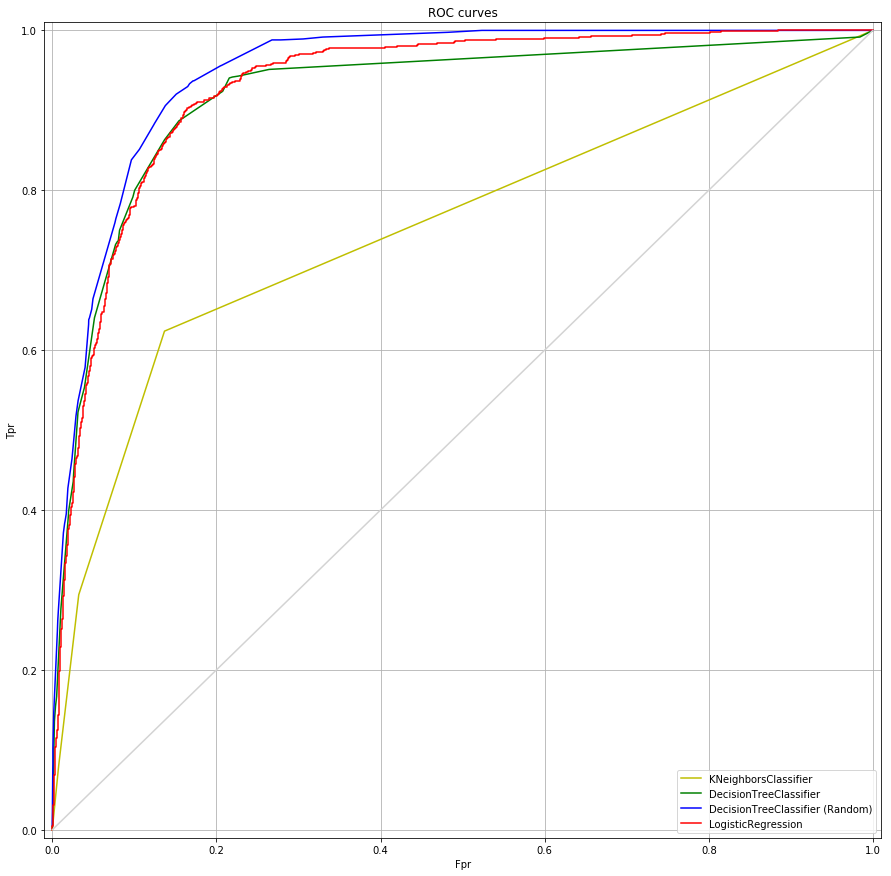

In [22]:
#Отобразим ROC_AUC
plt.figure(figsize=(15, 15))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.ylabel('Tpr')
plt.xlabel('Fpr')
plt.title('ROC curves')

Fpr_KNN, Tpr_KNN, thresholds = roc_curve(y_test, predict_proba_KNN[:,1])
plt.plot(Fpr_KNN, Tpr_KNN, 'y-' ,label='KNeighborsClassifier')

Fpr_DTC, Tpr_DTC, thresholds = roc_curve(y_test, predict_proba_DTC[:,1])
plt.plot(Fpr_DTC, Tpr_DTC, 'g-' ,label='DecisionTreeClassifier')

Fpr_DTC_Random, Tpr_DTC_Random, thresholds = roc_curve(y_test, predict_proba_DTC_Random[:,1])
plt.plot(Fpr_DTC_Random, Tpr_DTC_Random, 'b-' ,label='DecisionTreeClassifier (Random)')

Fpr_LR, Tpr_LR, thresholds = roc_curve(y_test, predict_proba_LR[:,1])
plt.plot(Fpr_LR, Tpr_LR, 'r-', label='LogisticRegression')

plt.plot([0, 1], [0, 1], 'lightgray')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
roc_auc_KNN = roc_auc_score(y_test, predict_proba_KNN[:,1])
roc_auc_DTC= roc_auc_score(y_test, predict_proba_DTC[:,1])
roc_auc_DTC_Random = roc_auc_score(y_test, predict_proba_DTC_Random[:,1])
roc_auc_LR = roc_auc_score(y_test, predict_proba_LR[:,1])

print('ROC_AUC\n--------------')
print('KNeighborsClassifier:\t\t\t', roc_auc_KNN)
print('DecisionTreeClassifier:\t\t\t', roc_auc_DTC)
print('DecisionTreeClassifier (Random):\t', roc_auc_DTC_Random)
print('LogisticRegression:\t\t\t', roc_auc_LR)

ROC_AUC
--------------
KNeighborsClassifier:			 0.7537220942529735
DecisionTreeClassifier:			 0.9194480058527822
DecisionTreeClassifier (Random):	 0.9478215951729034
LogisticRegression:			 0.9296849421240964


In [24]:
cvs_KNN = cross_val_score(model_KNN, X, y, scoring='roc_auc', cv=10).mean()
cvs_DTC = cross_val_score(model_DTC, X, y, scoring='roc_auc', cv=10).mean()
cvs_DTC_Random = cross_val_score(model_DTC_Random, X, y, scoring='roc_auc', cv=10).mean()
cvs_LR = cross_val_score(model_LR, X, y, scoring='roc_auc', cv=10).mean()

print('AVG_ROC_AUC\n------------')
print('KNeighborsClassifier\t\t\t', cvs_KNN)
print('DecisionTreeClassifier\t\t\t', cvs_DTC)
print('DecisionTreeClassifier (Random)\t\t', cvs_DTC_Random)
print('Logistic Regression\t\t\t', cvs_LR)


AVG_ROC_AUC
------------
KNeighborsClassifier			 0.7553029490771225
DecisionTreeClassifier			 0.930427484091563
DecisionTreeClassifier (Random)		 0.937605639313505
Logistic Regression			 0.9300912295141901


***
# Используем лучший алгоритм

## Подготовка тестовых данных

In [25]:
# переполучим данные заново, чистоты для 
df_test = pd.read_csv('data/test.csv')

# почистим и преобразуем
df_test_preproc = df_test.pipe(preproc_data)
X_test = df_test_preproc.drop(['_id'], axis=1)

# и наконец сделаем предсказание
result_predict = model_DTC_Random.predict(X_test)

In [26]:
X_test.shape,result_predict.shape,result_predict

((16476, 60), (16476,), array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
df_test['target'] = result_predict
#df_test.head().T
#df_test.info()
df_test.to_csv('data/team5full_df.csv', sep=',', encoding='utf-8', index=False)

In [28]:
submit2kaggle = pd.DataFrame({'_id':df_test['_id'],'target':result_predict})
#submit2kaggle.head(20)
#submit2kaggle.info()
submit2kaggle.to_csv('data/team5result.csv', sep=',', encoding='utf-8', index=False)